### DataPreProcessing Assignment

#### Name: Indupuri Rakesh
#### RegdNo: 21BCE9838

##### 1. Import necessary Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Import the Data set

In [64]:
df=pd.read_csv('Titanic-Dataset.csv')
df.shape
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 3. Handle Null values

In [66]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [67]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [69]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Cabin', ylabel='count'>

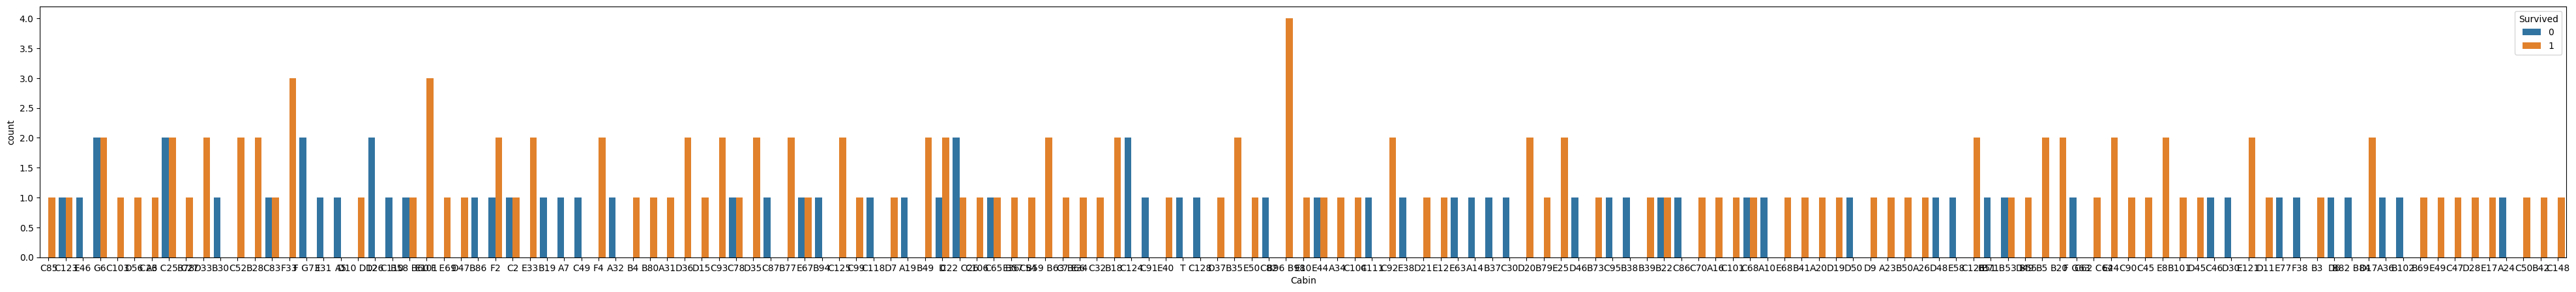

In [70]:
plt.figure(figsize=(50,5))
sns.countplot(x="Cabin", hue="Survived", data=df)

In [71]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### 4. Data Visualisation

In [72]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

<Axes: xlabel='Sex', ylabel='Survived'>

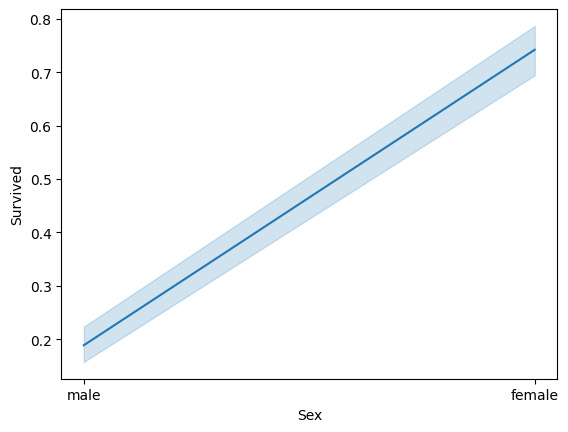

In [73]:
# sns.countplot(x="Sex", hue="Survived", data=df)
sns.lineplot(x='Sex',y='Survived',data=df)

c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Sex', ylabel='count'>

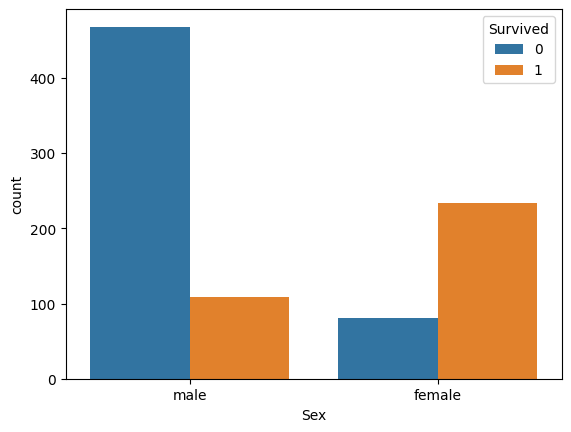

In [74]:
sns.countplot(x='Sex',hue='Survived',data=df)

c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='Pclass', ylabel='count'>

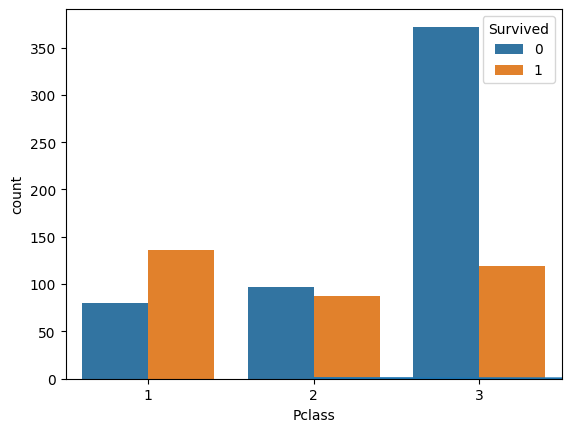

In [75]:
sns.lineplot(x='Pclass',y='Survived',data=df)
sns.countplot(x='Pclass',hue='Survived',data=df)

c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='Age', ylabel='Survived'>

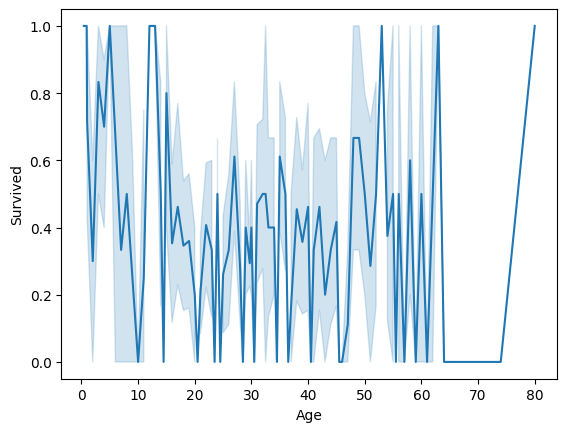

In [76]:
# sns.countplot(x="Age", hue="Survived", data=df)
sns.lineplot(x='Age',y='Survived',data=df)

c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='SibSp', ylabel='count'>

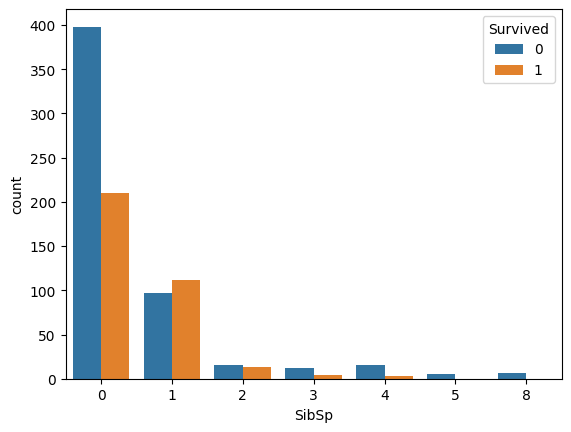

In [77]:
sns.countplot(x='SibSp',hue='Survived',data=df)

c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Fare', ylabel='Survived'>

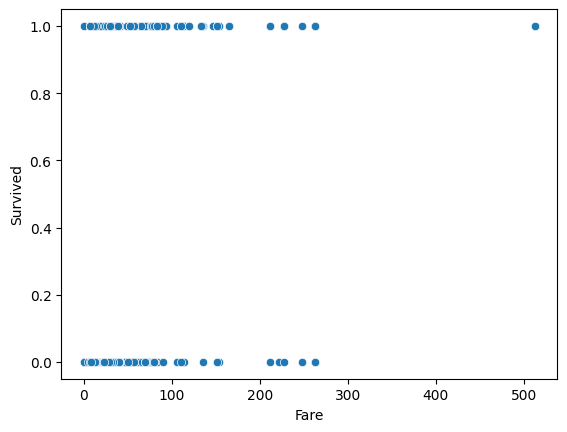

In [78]:
sns.scatterplot(x='Fare',y='Survived',data=df)

##### 5. Outlier Detection

In [79]:
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [80]:
df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [88]:
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\indup\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

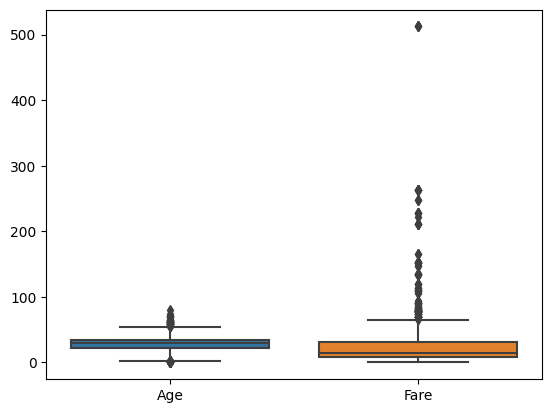

In [81]:
sns.boxplot(df[['Age','Fare']])

<Axes: >

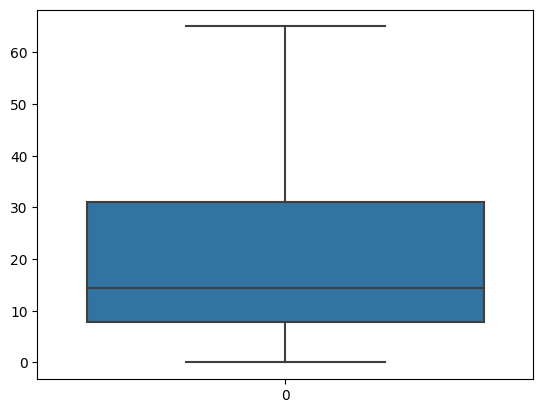

In [82]:
q1_Fare=df['Fare'].quantile(0.25)
q3_Fare=df['Fare'].quantile(0.75)
IQR_Fare=q3_Fare-q1_Fare
lowerbound_Fare=q1_Fare-1.5*IQR_Fare
upperbound_Fare=q3_Fare+1.5*IQR_Fare
df['Fare']=np.where(df['Fare']>=upperbound_Fare,df['Fare'].mean(),df['Fare'])
sns.boxplot(df['Fare'])

<Axes: >

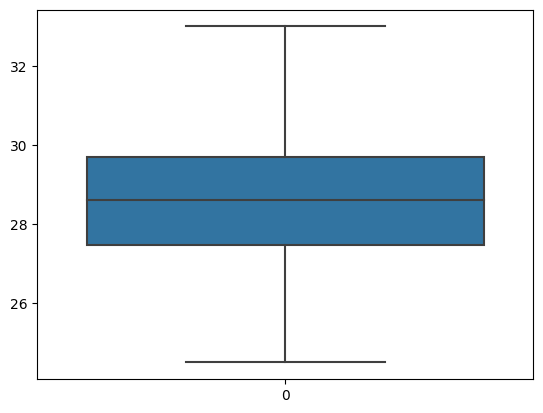

In [87]:
q1_Age=df['Age'].quantile(0.25)
q3_Age=df['Age'].quantile(0.75)
IQR_Age=q3_Age-q1_Age
lowerbound_Age=q1_Age-1.5*IQR_Age
upperbound_Age=q3_Age+1.5*IQR_Age
df['Age']=np.where((df['Age'] >= upperbound_Age),df['Age'].mean(),df['Age'])
df['Age']=np.where((df['Age'] <= lowerbound_Age),df['Age'].mean(),df['Age'])
# df['Age'] = np.where((df['Age'] <= lowerbound_Age) | (df['Age'] >= upperbound_Age), df['Age'].mean(), df['Age'])
sns.boxplot(df['Age'])

##### 6. Splitting Dependent and Independent variables

In [89]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,27.476308,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,28.599643,1,0,PC 17599,32.204208,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.994120,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",male,27.994120,0,0,373450,8.050000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.000000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,27.476308,0,0,112053,30.000000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.450000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.000000,C


In [ ]:
Independent=df.drop(columns=['Survived'])
Target=df['Survived']
Independent

##### 7. Encoding

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Independent['Name'] = le.fit_transform(df['Name'])
Independent['Name']
dict(zip((le.classes_),range(len(le.classes_))))

In [101]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Independent['Sex'] = le.fit_transform(df['Sex'])
Independent['Sex']
dict(zip((le.classes_),range(len(le.classes_))))

{'female': 0, 'male': 1}

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Independent['Ticket'] = le.fit_transform(df['Ticket'])
Independent['Ticket']
dict(zip((le.classes_),range(len(le.classes_))))

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Independent['Embarked'] = le.fit_transform(df['Embarked'])
Independent['Embarked']
dict(zip((le.classes_),range(len(le.classes_))))

{'C': 0, 'Q': 1, 'S': 2}

In [104]:
Independent.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,27.476308,1,0,523,7.250000,2
1,2,1,190,0,28.599643,1,0,596,32.204208,0
2,3,3,353,0,26.000000,0,0,669,7.925000,2
3,4,1,272,0,27.994120,1,0,49,53.100000,2
4,5,3,15,1,27.994120,0,0,472,8.050000,2


##### 8. Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Independent_scaled=pd.DataFrame(sc.fit_transform(Independent),columns=Independent.columns)
Independent_scaled

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.730108,0.827377,-1.310217,0.737695,-0.887023,0.432793,-0.473674,0.918966,-0.918474,0.585954
1,-1.726220,-1.566107,-0.991410,-1.355574,-0.081079,0.432793,-0.473674,1.282625,0.923286,-1.942303
2,-1.722332,0.827377,-0.357685,-1.355574,-1.946209,-0.474545,-0.473674,1.646283,-0.868656,0.585954
3,-1.718444,-1.566107,-0.672604,-1.355574,-0.515516,0.432793,-0.473674,-1.442322,2.465512,0.585954
4,-1.714556,0.827377,-1.671790,0.737695,-0.515516,-0.474545,-0.473674,0.664904,-0.859430,0.585954
...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,0.400452,0.737695,-1.228753,-0.474545,-0.473674,-1.183277,-0.494092,0.585954
887,1.718444,-1.566107,-0.552079,-1.355574,-0.887023,-0.474545,-0.473674,-1.616678,0.760603,0.585954
888,1.722332,0.827377,-0.124412,-1.355574,0.707745,0.432793,2.008933,1.676173,0.277176,0.585954
889,1.726220,-1.566107,-1.415189,0.737695,-1.946209,-0.474545,-0.473674,-1.646568,0.760603,-1.942303


##### 9. Splitting Data into Train and Test

In [108]:
from sklearn.model_selection import train_test_split
Independent_train,Independent_test,Target_train,Target_test=train_test_split(Independent_scaled,Target,test_size=0.2,random_state=0)
print(Independent.shape,Target.shape)
print(Independent_train.shape,Independent_test.shape,Target_train.shape,Target_test.shape)

(891, 10) (891,)
(712, 10) (179, 10) (712,) (179,)
